In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("50_Startups.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
data1=data.rename({'R&D Spend':"RDS", 'Administration':"ADS", 'Marketing Spend':"MKTS"},axis=1)

In [6]:
data1

,RDS,ADS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA #

In [7]:
data1.describe()

,RDS,ADS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADS     50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Correlation Analysis #

In [9]:
data1.corr()

,RDS,ADS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


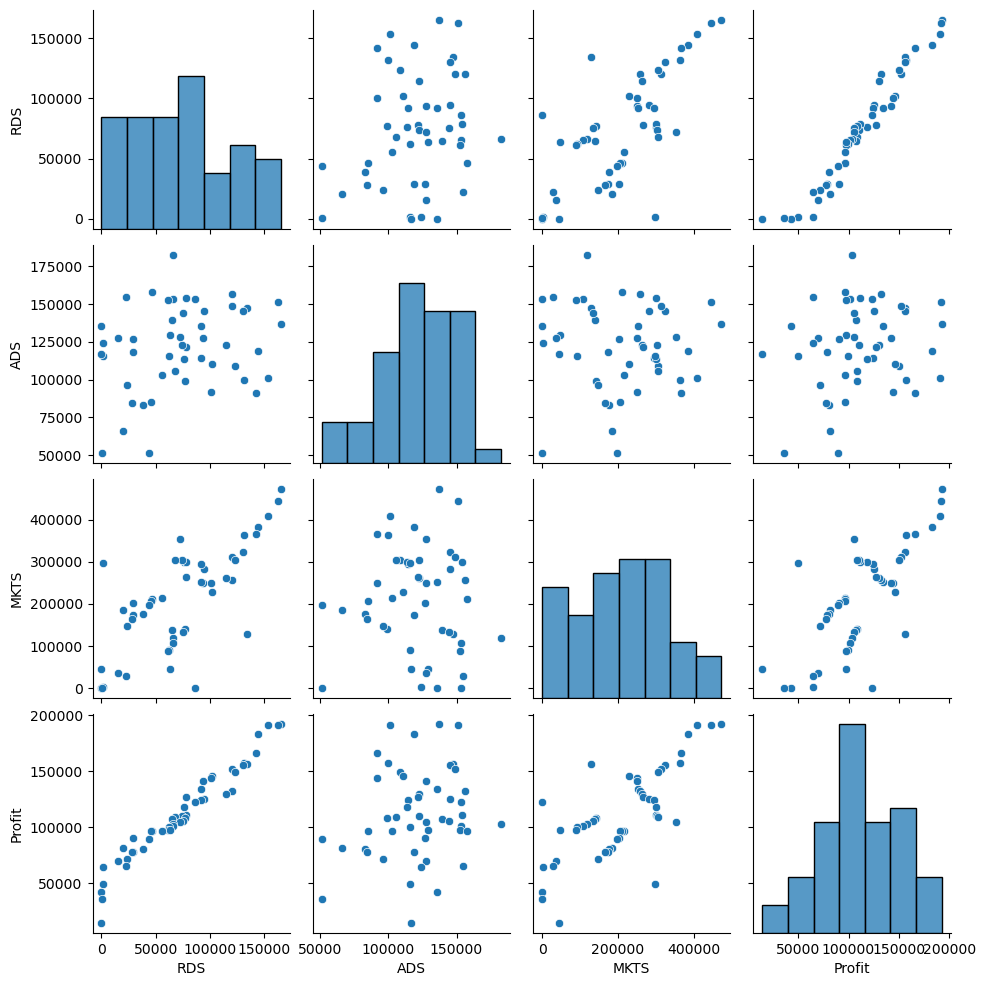

In [10]:
sns.pairplot(data1)

In [11]:
model=smf.ols("Profit~RDS+ADS+MKTS",data=data1).fit()

In [12]:
#model parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MKTS             0.027228
dtype: float64

In [13]:
model.tvalues

Intercept     7.626218
RDS          17.846374
ADS          -0.525507
MKTS          1.655077
dtype: float64

In [14]:
 np.round(model.pvalues,5)

Intercept    0.00000
RDS          0.00000
ADS          0.60176
MKTS         0.10472
dtype: float64

In [15]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [16]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
# Load the data from the CSV file
data = pd.read_csv('50_startups.csv')

# Separate the features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (Profit)

# Encode categorical variables
categorical_cols = ['State']
label_encoder = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(label_encoder.fit_transform)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train, X_test, y_train, y_test

(    R&D Spend  Administration  Marketing Spend  State
 12   93863.75       127320.38        249839.44      1
 4   142107.34        91391.77        366168.42      1
 37   44069.95        51283.14        197029.42      0
 8   120542.52       148718.95        311613.29      2
 3   144372.41       118671.85        383199.62      2
 6   134615.46       147198.87        127716.82      0
 41   27892.92        84710.77        164470.71      1
 46    1315.46       115816.21        297114.46      1
 47       0.00       135426.92             0.00      0
 15  114523.61       122616.84        261776.23      2
 9   123334.88       108679.17        304981.62      0
 16   78013.11       121597.55        264346.06      0
 24   77044.01        99281.34        140574.81      2
 34   46426.07       157693.92        210797.67      0
 31   61136.38       152701.92         88218.23      2
 0   165349.20       136897.80        471784.10      2
 44   22177.74       154806.14         28334.72      0
 27   7210

## Create transformation pipelines for the numerical and categorical features:

In [21]:
# Pipeline for numerical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Pipeline for categorical features
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

In [22]:
numerical_pipeline

Pipeline(steps=[('scaler', StandardScaler())])

In [23]:
categorical_pipeline

Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])

## Combine the pipelines and create the final preprocessing pipeline:

In [24]:
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create the preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])

## Create and train multiple regression models with different transformations and calculate the R^2 value for each model:

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define a list of models with different transformations
models = [
    ('Linear Regression', LinearRegression())]

# Create a table to store the R^2 values for each model
r2_table = pd.DataFrame(columns=['Model', 'R^2'])

# Train and evaluate each model
for name, model in models:
    # Create a pipeline with the preprocessing and the model
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Calculate the R^2 score on the test data
    r2_score = pipeline.score(X_test, y_test)
    
    # Append the model and R^2 score to the table
    r2_table = r2_table.append({'Model': name, 'R^2': r2_score}, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6740\3934038970.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_table = r2_table.append({'Model': name, 'R^2': r2_score}, ignore_index=True)


In [29]:
print(r2_table)

               Model       R^2
0  Linear Regression  0.900065
